In [4]:
import pandas as pd
import scipy.stats as stats #for statistical calculations
import numpy as np

In [5]:
data_frame = pd.read_csv("pet_adoption_data.csv")
data_frame.head()
data_frame=data_frame.drop(columns=["PetID"])

this is a data set of animals, their state and the time until they adopted with the "AdoptionLikelihood" for if they adopted eventually.

lets do some clarify to the data:

In [6]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   object 
 1   Breed               2007 non-null   object 
 2   AgeMonths           2007 non-null   int64  
 3   Color               2007 non-null   object 
 4   Size                2007 non-null   object 
 5   WeightKg            2007 non-null   float64
 6   Vaccinated          2007 non-null   int64  
 7   HealthCondition     2007 non-null   int64  
 8   TimeInShelterDays   2007 non-null   int64  
 9   AdoptionFee         2007 non-null   int64  
 10  PreviousOwner       2007 non-null   int64  
 11  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 188.3+ KB


lets check for missing elements:

In [7]:
print(data_frame['PetType'].describe())
print(data_frame['PetType'].value_counts())

count     2007
unique       4
top        Dog
freq       522
Name: PetType, dtype: object
PetType
Dog       522
Cat       505
Rabbit    493
Bird      487
Name: count, dtype: int64


and for the breeds:

In [8]:
print(data_frame['Breed'].value_counts())

Breed
Rabbit              493
Parakeet            487
Siamese             253
Persian             252
Labrador            193
Poodle              167
Golden Retriever    162
Name: count, dtype: int64


visualization of the distribution:



In [9]:
!pip install plotly


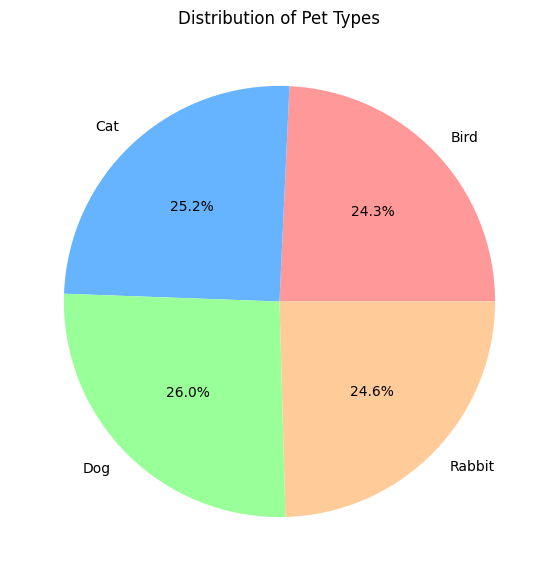

In [10]:
import matplotlib.pyplot as plt

# Group by PetType and count occurrences
content_type = data_frame.groupby(['PetType']).size().reset_index(name='counts')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
# Plotting Distribution of Pet Types using Matplotlib
plt.figure(figsize=(9, 7))
plt.pie(content_type['counts'], labels=content_type['PetType'], colors=colors[:len(content_type)], autopct='%1.1f%%')
plt.title('Distribution of Pet Types')
plt.show()

and for the breeds:

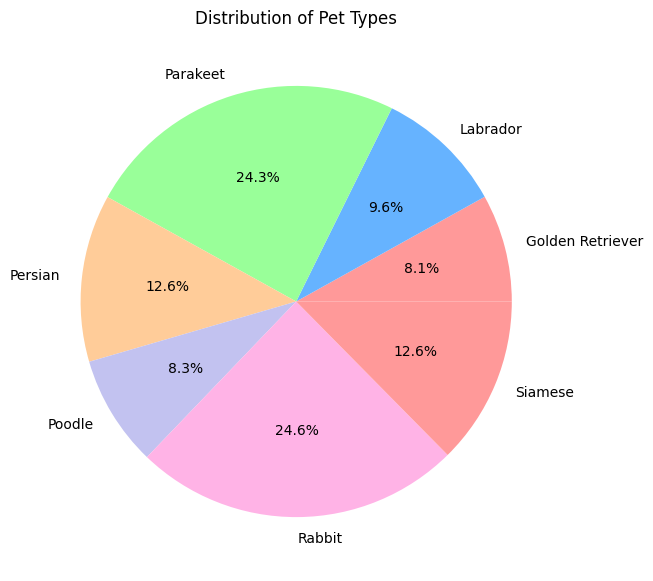

In [11]:
import matplotlib.pyplot as plt

# Group by PetType and count occurrences
content_type = data_frame.groupby(['Breed']).size().reset_index(name='counts')

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
# Plotting Distribution of Pet Types using Matplotlib
plt.figure(figsize=(9, 7))
plt.pie(content_type['counts'], labels=content_type['Breed'], colors=colors[:len(content_type)], autopct='%1.1f%%')
plt.title('Distribution of Pet Types')
plt.show()


now for the learning, we will try couple of models and then we will see which is the best:

first, we want to predict the time in shelter for a new animal to check if its necessery to keep her at the hostel or to not give the animal false hope :(

for this mission we will use regression, we will try:

1.random forest regressor

2.gradient boosting regressor

3.SVR - support vector regression


4.neural network - for deep learning.

*first* - lets handle catagorial features:

In [12]:
#so as we saw catagorical is string or object and numarical are numbers:
numaric_vars = data_frame.select_dtypes(include=['int64', 'float64']).columns
other_col = set(data_frame.columns) - set(numaric_vars)
numbers_col = set(numaric_vars)

print(f"Number of Numerical variables: {len(numbers_col)}")
print(f"Number of Categorical variables: {len(other_col)}")

#when:
print("\n\nwhere the numarical are:\n", numbers_col)
print("\n\nand the catagorial: \n", other_col)

Number of Numerical variables: 8
Number of Categorical variables: 4


where the numarical are:
 {'AdoptionLikelihood', 'Vaccinated', 'AdoptionFee', 'TimeInShelterDays', 'AgeMonths', 'WeightKg', 'HealthCondition', 'PreviousOwner'}


and the catagorial: 
 {'Color', 'Breed', 'PetType', 'Size'}


In [13]:
#check how many
for col in other_col:
    print(f'Unique values in {col}: {data_frame[col].unique()}')

Unique values in Color: ['Orange' 'White' 'Gray' 'Brown' 'Black']
Unique values in Breed: ['Parakeet' 'Rabbit' 'Golden Retriever' 'Labrador' 'Siamese' 'Persian'
 'Poodle']
Unique values in PetType: ['Bird' 'Rabbit' 'Dog' 'Cat']
Unique values in Size: ['Large' 'Medium' 'Small']


we will make the catagorial feature numerical:

In [14]:


def create_mapping_and_replace(data_frame, column):
    unique_values = data_frame[column].unique()
    value_mapping = {name: idx for idx, name in enumerate(unique_values)}
    data_frame[column] = data_frame[column].map(value_mapping)
    return value_mapping


# List of columns to be encoded
#encode because maybe have relations
columns_to_encode = {'PetType','Size'}

# Dictionaries to store the mappings
mappings = {}

for col in columns_to_encode:
    mappings[col] = create_mapping_and_replace(data_frame, col)

print(data_frame.head())
print(data_frame['PetType'].unique())

   PetType             Breed  AgeMonths   Color  Size   WeightKg  Vaccinated  \
0        0          Parakeet        131  Orange     0   5.039768           1   
1        1            Rabbit         73   White     0  16.086727           0   
2        2  Golden Retriever        136  Orange     1   2.076286           0   
3        0          Parakeet         97   White     2   3.339423           0   
4        1            Rabbit        123    Gray     0  20.498100           0   

   HealthCondition  TimeInShelterDays  AdoptionFee  PreviousOwner  \
0                0                 27          140              0   
1                0                  8          235              0   
2                0                 85          385              0   
3                0                 61          217              1   
4                0                 28           14              1   

   AdoptionLikelihood  
0                   0  
1                   0  
2                   0  
3       

In [15]:
print(mappings)

{'PetType': {'Bird': 0, 'Rabbit': 1, 'Dog': 2, 'Cat': 3}, 'Size': {'Large': 0, 'Medium': 1, 'Small': 2}}


and we will encode the breeds and sizes as one hot vector because they dont have relations:

In [16]:
data_frame=pd.get_dummies(data_frame, columns=['Breed', 'Color'], drop_first=True)
data_frame.head()

,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,0,131,0,5.039768,1,0,27,140,0,0,False,True,False,False,False,False,False,False,True,False
1,1,73,0,16.086727,0,0,8,235,0,0,False,False,False,False,True,False,False,False,False,True
2,2,136,1,2.076286,0,0,85,385,0,0,False,False,False,False,False,False,False,False,True,False
3,0,97,2,3.339423,0,0,61,217,1,0,False,True,False,False,False,False,False,False,False,True
4,1,123,0,20.498100,0,0,28,14,1,0,False,False,False,False,True,False,False,True,False,False


In [17]:
List=["Breed_Labrador","Breed_Parakeet","Breed_Persian","Breed_Poodle","Breed_Siamese","Breed_Rabbit","Color_Brown",
     "Color_Gray","Color_Orange","Color_White"]
data_frame[List]=data_frame[List].astype(int)
data_frame.head()

,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Brown,Color_Gray,Color_Orange,Color_White
0,0,131,0,5.039768,1,0,27,140,0,0,0,1,0,0,0,0,0,0,1,0
1,1,73,0,16.086727,0,0,8,235,0,0,0,0,0,0,1,0,0,0,0,1
2,2,136,1,2.076286,0,0,85,385,0,0,0,0,0,0,0,0,0,0,1,0
3,0,97,2,3.339423,0,0,61,217,1,0,0,1,0,0,0,0,0,0,0,1
4,1,123,0,20.498100,0,0,28,14,1,0,0,0,0,0,1,0,0,1,0,0


we will take some animals to perform some test later:

In [18]:
df_likelihood_0 = data_frame[data_frame['AdoptionLikelihood'] == 0]
df_likelihood_1 = data_frame[data_frame['AdoptionLikelihood'] == 1]

df_likelihood_1 = df_likelihood_1.drop(columns="AdoptionLikelihood")
df_likelihood_0=df_likelihood_0.drop(columns="AdoptionLikelihood")
# Get a random row from the filtered DataFrame
animal1 = df_likelihood_0.sample(n=1)
animal2 = df_likelihood_0.sample(n=1)
animal3 = df_likelihood_1.sample(n=1)
animal4 = df_likelihood_1.sample(n=1)

lets create x,y and split into train and test:
we think all of the feature are necessery for prediction.

In [19]:
from sklearn.model_selection import train_test_split

target_col = 'AdoptionLikelihood'

# Split the data into features and target

y = data_frame[target_col]
X = data_frame.drop(columns=[target_col])

print(X)


      PetType  AgeMonths  Size   WeightKg  Vaccinated  HealthCondition  \
0           0        131     0   5.039768           1                0   
1           1         73     0  16.086727           0                0   
2           2        136     1   2.076286           0                0   
3           0         97     2   3.339423           0                0   
4           1        123     0  20.498100           0                0   
...       ...        ...   ...        ...         ...              ...   
2002        2         72     2  27.039045           1                0   
2003        1        124     2   4.726954           1                1   
2004        1        113     2   1.758592           1                0   
2005        2         12     0  20.961592           1                0   
2006        1        126     1  18.519788           1                0   

      TimeInShelterDays  AdoptionFee  PreviousOwner  Breed_Labrador  \
0                    27          140    

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**lets start with random forest:**


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Single decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(f'Accuracy Single Tree: {accuracy_score(y_test, y_pred_tree)}')



Accuracy Single Tree: 0.8930348258706468


In [23]:

from sklearn.ensemble import BaggingClassifier

# Bagging classifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),  # weak learner
    n_estimators=500,          # number of learners to train
    max_samples=0.8,           # proportion of samples to draw from X to train each base estimator
    bootstrap=True,            # whether samples are drawn with replacement
    random_state=42,           # ensures replicable results
    oob_score=True             # whether to use out-of-bag samples to estimate the generalization error
)

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

print(f'Accuracy Bagging: {accuracy_score(y_test, y_pred_bag)}')
print(f'OOB score: {bag_clf.oob_score_}')

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import  GridSearchCV


# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_




In [ ]:
# Evaluate the best model on the test set
y_pred_random = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]



# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_random)
mse = mean_squared_error(y_test, y_pred_random)
r2 = r2_score(y_test, y_pred_random)


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.06467661691542288
Mean Squared Error: 0.06467661691542288
R-squared: 0.7067340067340067


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       270
           1       0.92      0.88      0.90       132

    accuracy                           0.94       402
   macro avg       0.93      0.92      0.93       402
weighted avg       0.94      0.94      0.93       402



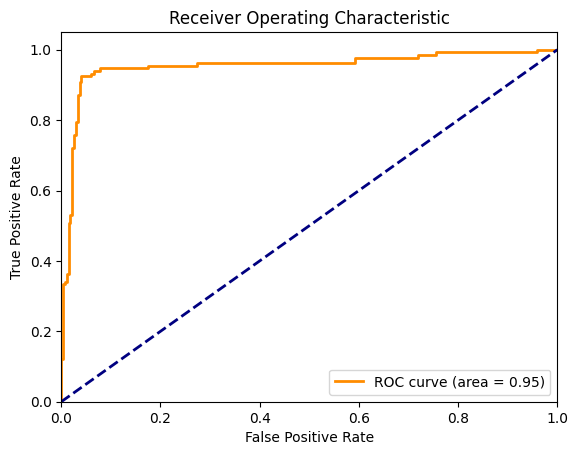

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print classification report
print(classification_report(y_test, y_pred_random))

# Plot AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**now lets try gradient boosting**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
# Define models
catboost_model = CatBoostClassifier(random_state=42, verbose=False)
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

models = {
    'CatBoost': catboost_model,
    'LightGBM': lgbm_model,
    'XGBoost': xgb_model
}



param_grid = {
    'learning_rate':[0.01,0.1,0.2,0.3],
    'max_depth':[3,4,5,6,7]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=5)
grid_search_xgb.fit(X_train,y_train)

grid_search_lgbtm = GridSearchCV(estimator=lgbm_model,param_grid=param_grid,cv=5)
grid_search_lgbtm.fit(X_train,y_train)


grid_search_cat = GridSearchCV(estimator=catboost_model,param_grid=param_grid,cv=5)
grid_search_cat.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 421, number of negative: 863
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 797
[LightGBM] [Info] Number of data points in the train set: 1284, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327882 -> initscore=-0.717782
[LightGBM] [Info] Start training from score -0.717782
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001CC06F48D90>,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5, 6, 7]})

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)
val_accuracy_xgb = accuracy_score(y_test,y_pred_xgb)

y_pred_lgbtm = grid_search_lgbtm.best_estimator_.predict(X_test)
val_accuracy_lgbtm = accuracy_score(y_test,y_pred_lgbtm)

y_pred_cat = grid_search_cat.best_estimator_.predict(X_test)
val_accuracy_cat = accuracy_score(y_test,y_pred_cat)






print(f"val accuracy xgb: {val_accuracy_xgb:.5f},val accuracy lgbtm: {val_accuracy_lgbtm:.5f},val accuracy cat: {val_accuracy_cat:.5f}")


val accuracy xgb: 0.95274,val accuracy lgbtm: 0.94527,val accuracy cat: 0.95522


**now model using svr**


In [ ]:
from sklearn.svm import SVR



# Define and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.3926751702210244
Mean Squared Error: 0.22362165393254801
R-squared: -0.01397737828606882


In [ ]:
from sklearn.svm import SVR

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Define and train the SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 0.3],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_svr_model = grid_search.best_estimator_


# Validate the model
y_val_pred = best_svr_model.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation Mean Absolute Error: {val_mae}')
print(f'Validation Mean Squared Error: {val_mse}')
print(f'Validation Root Mean Squared Error: {val_rmse}')
print(f'Validation R-squared: {val_r2}')

# Test the model
y_test_pred = best_svr_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test Mean Absolute Error: {test_mae}')
print(f'Test Mean Squared Error: {test_mse}')
print(f'Test Root Mean Squared Error: {test_rmse}')
print(f'Test R-squared: {test_r2}')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ........C=0.1, epsilon=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .......C=0.1, epsilon=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, kernel=sigmoid; total time=   0.0s
[CV] END ....C=0.1, epsilon=0.1, gamma=scale, k

**now neural network**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

NameError: name 'train_test_split' is not defined

train test:

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1605, 20)
(402, 20)


In [ ]:
import tensorflow as tf
from tensorflow import keras

#I will create a neural network
#I will have same number of neurons as columns, so 20
#we use relu as activation function because is easy to compute relu

model_ANN=keras.Sequential([
    keras.layers.Dense(20,input_shape=(20,),activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    
])

#loss is binary_crossentropy because our output is binary, zero and one
#adam is a very commonly used optimizer
model_ANN.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model_ANN.fit(X_train,y_train,epochs=50)

Epoch 1/50
51/51 [==============================] - 1s 2ms/step - loss: 0.5967 - accuracy: 0.6947
Epoch 2/50
51/51 [==============================] - 0s 3ms/step - loss: 0.5386 - accuracy: 0.7333
Epoch 3/50
51/51 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7421
Epoch 4/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4794 - accuracy: 0.7551
Epoch 5/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7664
Epoch 6/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.7707
Epoch 7/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7888
Epoch 8/50
51/51 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7863
Epoch 9/50
51/51 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.7981
Epoch 10/50
51/51 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8118
Epoch 11/50
51/51 [

In [ ]:
y_pred_ANN=model_ANN.predict(X_test)
y_pred_ANN=y_pred_ANN.round().astype(int)
from sklearn.metrics import classification_report,confusion_matrix
print('classification report :\n', classification_report(y_test,y_pred_ANN))

13/13 [==============================] - 0s 1ms/step
classification report :
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       270
           1       0.82      0.86      0.84       132

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



now lets take another way of thinking to do a regression on the timeInShelter time and not on the adoption likelihood, because if we predict the likelihood its by the time given from the time in shelter, so if the likelihhod is 0 it can be that in 3 more days it will get adopted.

lets split to train and test again but this time the x- all the features when the we will call the breeds and sizes as dummy features and:

y- target - TimeInShelterDays


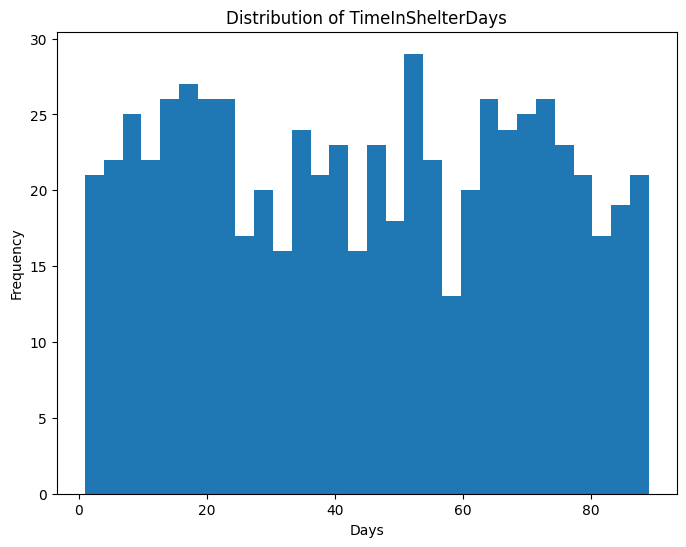

In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt



target_col = ['TimeInShelterDays','AdoptionLikelihood','WeightKg']

data_of_adopted = data_frame[data_frame['AdoptionLikelihood'] == 1]

# Split the data into features and target


y = data_of_adopted[target_col[0]]
X = data_of_adopted.drop(columns=target_col)


#X=scaler.fit_transform(X)
#i dont want to scale because its making a mess



# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardizing the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Normalize the target variable
target_scaler = MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_val = target_scaler.transform(y_val.values.reshape(-1, 1)).flatten()
y_test = target_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# Verify the distribution of the target variable
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30)
plt.title('Distribution of TimeInShelterDays')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Epoch [10/100], Train Loss: 0.1051, Validation Loss: 0.0987
Epoch [20/100], Train Loss: 0.0979, Validation Loss: 0.0963
Epoch [30/100], Train Loss: 0.0907, Validation Loss: 0.0844
Epoch [40/100], Train Loss: 0.0916, Validation Loss: 0.0840
Early stopping at epoch 47
y_test shape: (99,)
y_pred_test shape: (99,)
Test MSE: 603.1817626953125
Test MAE: 21.259193420410156
Test R^2: -0.14045784776821324


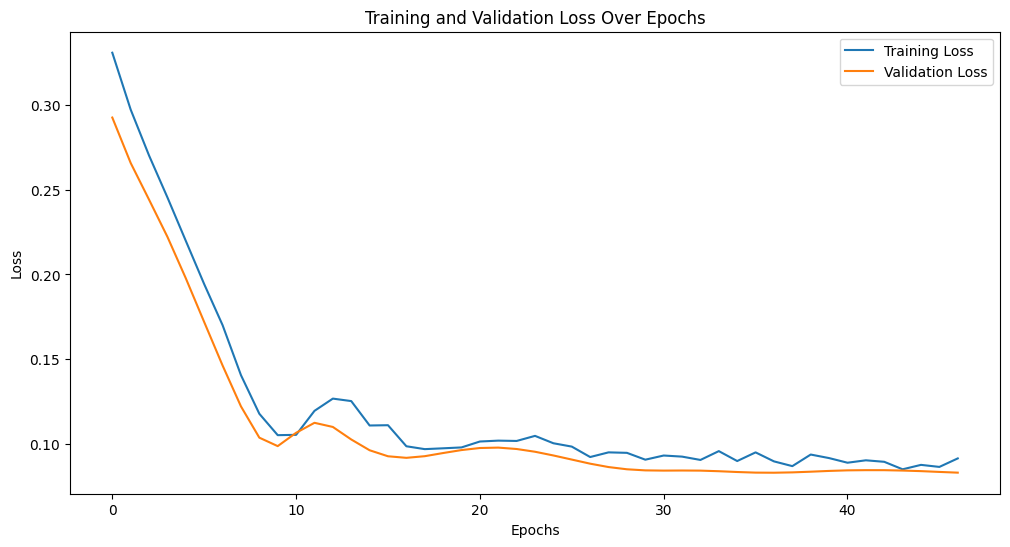

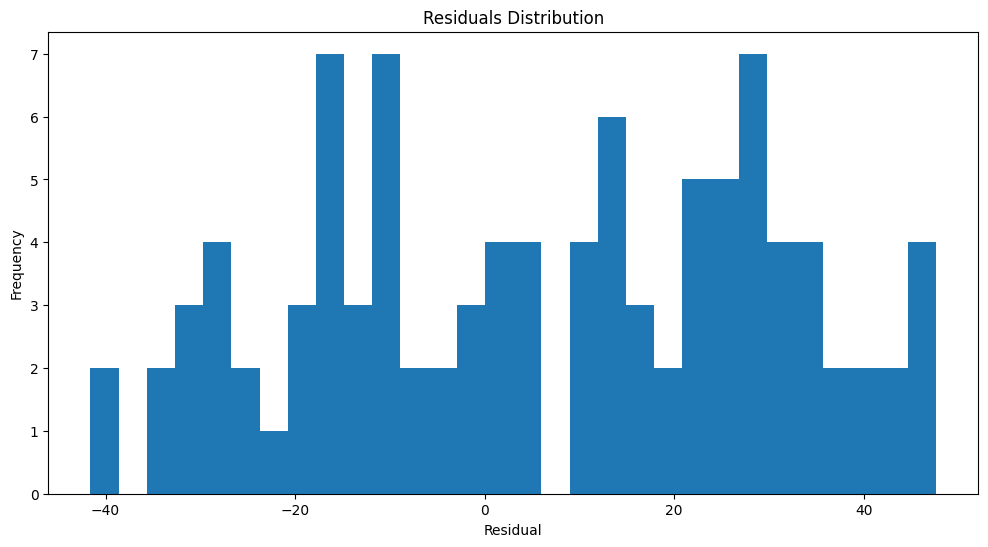

Overfitting occurs when a model learns the training data too well, including the noise and outliers, making it less generalizable to new data. To avoid overfitting, techniques such as early stopping, dropout, and cross-validation are used. Early stopping monitors the validation loss during training and stops training when it stops improving. Dropout randomly drops neurons during training to prevent the model from becoming too dependent on specific neurons, thereby promoting generalization.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define the PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

input_dim = X_train.shape[1]
model = RegressionModel(input_dim)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 10
min_val_loss = np.inf
patience = 0

# Training the model
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Early stopping
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        patience = 0
        best_model = model.state_dict()
    else:
        patience += 1
        if patience >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Load the best model
model.load_state_dict(best_model)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()


# Inverse transform the predictions and target values
y_pred_test = target_scaler.inverse_transform(y_pred_test).flatten()
y_test = target_scaler.inverse_transform(y_test_tensor.numpy()).flatten()

# Ensure y_test and y_pred_test have consistent shapes
print(f'y_test shape: {y_test.shape}')
print(f'y_pred_test shape: {y_pred_test.shape}')

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {r2_test}")

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot residuals
# Ensure y_pred_test is 1-dimensional for residual computation
y_pred_test = y_pred_test.flatten()

residuals = y_test - y_pred_test
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Overfitting explanation
print("Overfitting occurs when a model learns the training data too well, including the noise and outliers, making it less generalizable to new data. To avoid overfitting, techniques such as early stopping, dropout, and cross-validation are used. Early stopping monitors the validation loss during training and stops training when it stops improving. Dropout randomly drops neurons during training to prevent the model from becoming too dependent on specific neurons, thereby promoting generalization.")

Epoch [10/100], Train Loss: 0.2647, Validation Loss: 0.2521
Epoch [20/100], Train Loss: 0.2541, Validation Loss: 0.2535
Early stopping at epoch 22
y_test shape: (99,)
y_pred_test shape: (99,)
Test MSE: 617.3477574237197
Test MAE: 21.453560260811237
Test R^2: -0.1672420035808202
Accuracy within 10 days: 20.20%


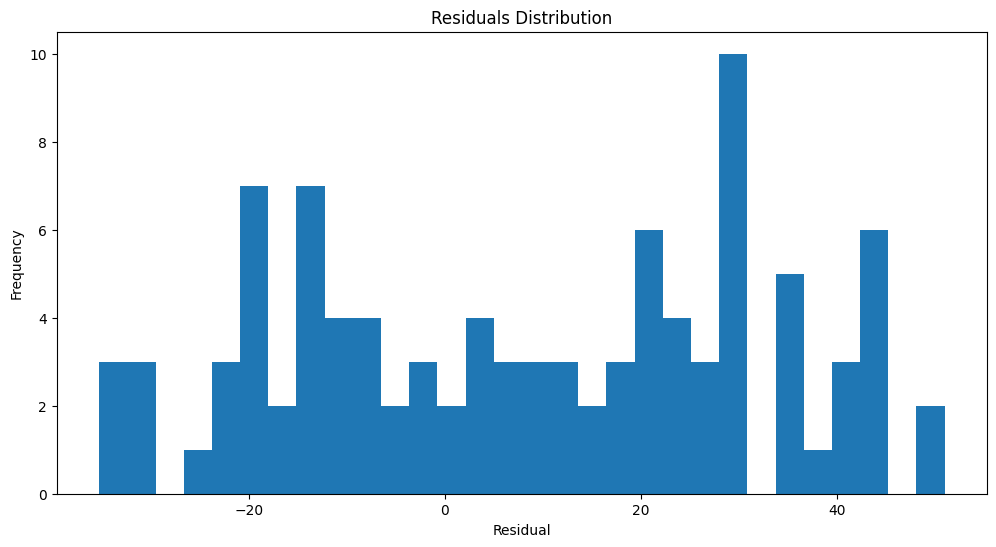

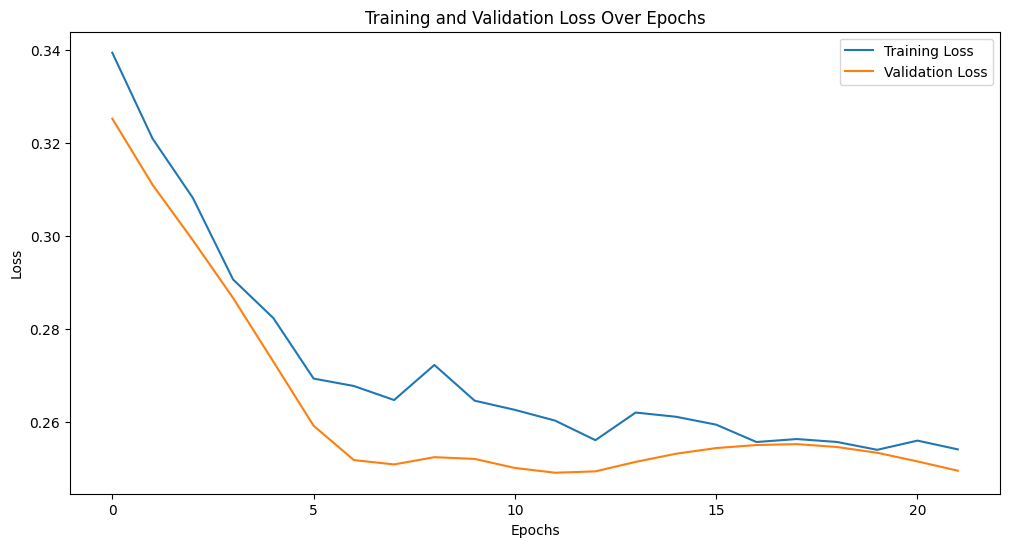

In [26]:

# Define the PyTorch model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 256)
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(256, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 64)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x

input_dim = X_train.shape[1]
model = RegressionModel(input_dim)

# Define loss and optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Early stopping parameters
early_stopping_patience = 10
min_val_loss = np.inf
patience = 0

# Training the model
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    # Training
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    # Early stopping
    if val_loss < min_val_loss:
        min_val_loss = val_loss
        patience = 0
        best_model = model.state_dict()
    else:
        patience += 1
        if patience >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

# Load the best model
model.load_state_dict(best_model)

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()

# Inverse transform the predictions and target values
y_pred_test = target_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()
y_test = target_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Ensure y_test and y_pred_test have consistent shapes
print(f'y_test shape: {y_test.shape}')
print(f'y_pred_test shape: {y_pred_test.shape}')

# Calculate performance metrics
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse_test}")
print(f"Test MAE: {mae_test}")
print(f"Test R^2: {r2_test}")

# Custom accuracy-like metric: Percentage of predictions within a threshold
threshold = 10  # Define a threshold value
accuracy_within_threshold = np.mean(np.abs(y_test - y_pred_test) <= threshold)
print(f"Accuracy within {threshold} days: {accuracy_within_threshold * 100:.2f}%")

# Compute residuals and plot
residuals = y_test - y_pred_test
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30)
plt.title('Residuals Distribution')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



lets try to get a prediction of the likelihood of an animal we create:


"
538,Dog,Golden Retriever,31,Gray,Medium,24.757792150970186,1,0,1,358,0,1

539,Dog,Golden Retriever,47,Brown,Medium,16.55924264341,0,0,22,340,1,0

540,Bird,Parakeet,55,Orange,Medium,25.938280711318868,1,0,62,145,0,1

541,Dog,Labrador,106,Black,Medium,7.1780242754546615,0,0,79,333,1,1

542,Bird,Parakeet,158,Black,Medium,18.62557471959973,1,0,26,142,0,1

"
from the csv, lets check few

PetType	Breed	AgeMonths	Color	Size	WeightKg	Vaccinated	HealthCondition	TimeInShelterDays	AdoptionFee	PreviousOwner	AdoptionLikelihood

In [29]:
import pandas as pd
import torch
import numpy as np

# Define mappings for categorical variables
mappings = {
    'PetType': {'Dog': 1, 'Cat': 0, 'Bird': 2, 'Rabbit': 3},
    'Size': {'Small': 0, 'Medium': 1, 'Large': 2}
}

def build(PetType, Breed, AgeMonths, Color, Size, WeightKg, Vaccinated, HealthCondition, AdoptionFee, PreviousOwner):
    # Initialize all possible breed and color columns to 0
    breeds = ['Breed_Labrador', 'Breed_Parakeet', 'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit', 'Breed_Siamese']
    colors = ['Color_Brown', 'Color_Gray', 'Color_Orange', 'Color_White']
    
    data = {
        'PetType': [PetType],
        'AgeMonths': [AgeMonths],
        'Size': [Size],
        #'WeightKg': [WeightKg],
        'Vaccinated': [Vaccinated],
        'HealthCondition': [HealthCondition],
        'AdoptionFee': [AdoptionFee],
        'PreviousOwner': [PreviousOwner],
    }
    
    # Add breed columns
    for breed in breeds:
        data[breed] = [1 if breed.split('_')[1] == Breed else 0]
    
    # Add color columns
    for color in colors:
        data[color] = [1 if color.split('_')[1] == Color else 0]
    
    # Convert the dictionary to a DataFrame
    df = pd.DataFrame(data)

    # Encode categorical columns
    columns_to_encode = {'PetType', 'Size'}

    for col in columns_to_encode:
        df[col] = df[col].map(mappings[col])
    
    return df

# Example of using the build function to create a new animal
#animal10 = build("Bird", "Parakeet", 158, "Black", "Medium", 18.62557471959973, 1, 0, 142, 0)
'''
animal20 = build("Dog", "Golden Retriever", 47, "Brown", "Medium", 16.55924264341, 0, 0, 1, 340, 1)
animal30 = build("Bird", "Parakeet", 55, "Orange", "Medium", 25.938280711318868, 1, 0, 62, 145, 0)
animal40 = build("Dog", "Labrador", 10, "Black", "Medium", 7.1780242754546615, 1, 0, 2, 333, 1)
animal50 = build("Bird", "Parakeet", 158, "Black", "Medium", 18.62557471959973, 1, 0, 26, 142, 0)
animal6 = build("Bird", "Parakeet", 97, "White", "Small", 3.339423254344144, 0, 0, 61, 217, 1)
animal7 = build("Rabbit", "Rabbit", 123, "Gray", "Large", 20.49809976164308, 0, 0, 100, 14, 1)
animal8 = build("Dog", "Labrador", 70, "Brown", "Large", 20.986260902397984, 0, 0, 87, 301, 1)
animal9 = build("Bird", "Parakeet", 169, "Brown", "Small", 10.90261279164483, 1, 0, 30, 40,1)

'''
animal30 = build("Bird", "Parakeet", 55, "Orange", "Medium", 25.938280711318868, 1, 1, 145, 0)

# Preprocess the new animal data using the same scaler as the training data
animal10_scaled = scaler.transform(animal30)

# Convert the preprocessed data to a PyTorch tensor
X_test_tensor = torch.tensor(animal10_scaled, dtype=torch.float32)

# Predict the TimeInShelterDays using the trained model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()

# Inverse transform the predictions to get them back to the original scale
y_pred_test = target_scaler.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

print(f"Predicted TimeInShelterDays: {y_pred_test[0]}")


Predicted TimeInShelterDays: 46.992156982421875
